In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.DataFrame({'names': ['Macbook Air', 'Surface pro', 'Lenovo Y700'],
                 'prices': [7999, 5899, 5400],
                 'purchased date': ['2020-11', '2018-08', '2016-06']})
df

,names,prices,purchased date
0,Macbook Air,7999,2020-11
1,Surface pro,5899,2018-08
2,Lenovo Y700,5400,2016-06


In [3]:
df2 = pd.DataFrame(np.random.standard_normal((10, 5)), 
        columns=['No1', 'No2', 'No3', 'No4', 'No5'])
df2

,No1,No2,No3,No4,No5
0,-0.760527,-0.254152,-1.914540,0.999199,-0.629903
1,-0.338974,-0.205624,-0.392655,-0.635022,0.021506
2,-0.363990,-1.343694,-1.905690,-0.186534,-0.162222
3,0.108312,-1.471687,0.354154,-1.168533,1.061342
4,-0.256702,-0.789745,-1.442139,1.953366,-0.339898
5,-0.301468,2.278714,-0.604412,0.614961,-0.738523
6,0.008237,-1.385913,0.901326,0.748383,-0.701011
7,-0.830897,0.010780,0.015872,0.815065,0.651695
8,0.975787,-0.114467,0.825035,-1.643582,-0.595394
9,-1.041603,0.330723,1.184834,-0.583556,0.764108


In [4]:
len(df2.index)

10

In [5]:
dates = pd.date_range(start='2020-01', periods=len(df2.index), freq='M')
dates

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31'],
              dtype='datetime64[ns]', freq='M')

In [6]:
df2.index = dates
df2.index.name = 'Dates'
df2

,No1,No2,No3,No4,No5
Dates,,,,,
2020-01-31,-0.760527,-0.254152,-1.914540,0.999199,-0.629903
2020-02-29,-0.338974,-0.205624,-0.392655,-0.635022,0.021506
2020-03-31,-0.363990,-1.343694,-1.905690,-0.186534,-0.162222
2020-04-30,0.108312,-1.471687,0.354154,-1.168533,1.061342
2020-05-31,-0.256702,-0.789745,-1.442139,1.953366,-0.339898
2020-06-30,-0.301468,2.278714,-0.604412,0.614961,-0.738523
2020-07-31,0.008237,-1.385913,0.901326,0.748383,-0.701011
2020-08-31,-0.830897,0.010780,0.015872,0.815065,0.651695
2020-09-30,0.975787,-0.114467,0.825035,-1.643582,-0.595394


## Analytic

In [7]:
df2.describe()

,No1,No2,No3,No4,No5
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-0.280182,-0.294507,-0.297822,0.091375,-0.066830
std,0.571240,1.109079,1.156238,1.114478,0.668395
min,-1.041603,-1.471687,-1.914540,-1.643582,-0.738523
25%,-0.661393,-1.205207,-1.232707,-0.622155,-0.621275
50%,-0.320221,-0.229888,-0.188391,0.214214,-0.251060
75%,-0.057998,-0.020532,0.707315,0.798394,0.494148
max,0.975787,2.278714,1.184834,1.953366,1.061342


In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')

No handles with labels found to put in legend.


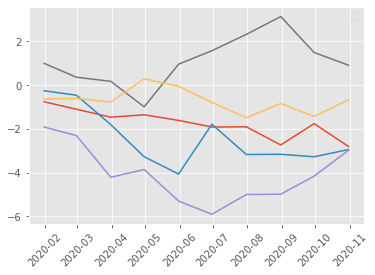

In [9]:
label = ['No1', 'No2', 'No3', 'No4', 'No5']
plt.plot(df2.cumsum())
plt.xticks(rotation=45)
plt.legend(loc=0)
plt.show()

In [10]:
df2.columns

Index(['No1', 'No2', 'No3', 'No4', 'No5'], dtype='object')

## Financial data

In [11]:
from pandas_datareader import DataReader as web

In [12]:
fb = web(name='FB', data_source='yahoo', start='2010-01-01')
fb.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-09,287.630005,271.750000,283.660004,277.920013,25189700,277.920013
2020-12-10,278.730011,271.859985,275.540009,277.119995,20065100,277.119995
2020-12-11,276.480011,270.250000,274.529999,273.549988,14391400,273.549988
2020-12-14,277.220001,271.559998,273.369995,274.190002,16366500,274.190002
2020-12-15,276.079987,267.470001,274.829987,275.549988,20887233,275.549988


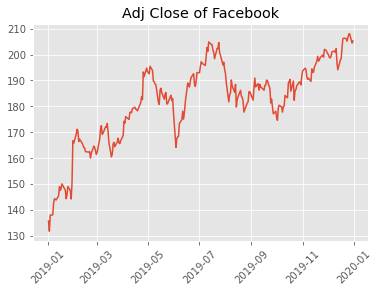

In [13]:
plt.plot(fb['Adj Close'].loc['2019-01-01':'2019-12-31'])
plt.xticks(rotation=45)
plt.title('Adj Close of Facebook')
plt.show()

## Calculate the log return

In [14]:
%time
fb['log return'] = np.log(fb['Adj Close']) - np.log(fb['Adj Close'].shift(1))
fb['log return'].head()

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs


Date
2012-05-18         NaN
2012-05-21   -0.116378
2012-05-22   -0.093255
2012-05-23    0.031749
2012-05-24    0.031680
Name: log return, dtype: float64

In [15]:
fb.tail()

,High,Low,Open,Close,Volume,Adj Close,log return
Date,,,,,,,
2020-12-09,287.630005,271.750000,283.660004,277.920013,25189700,277.920013,-0.019526
2020-12-10,278.730011,271.859985,275.540009,277.119995,20065100,277.119995,-0.002883
2020-12-11,276.480011,270.250000,274.529999,273.549988,14391400,273.549988,-0.012966
2020-12-14,277.220001,271.559998,273.369995,274.190002,16366500,274.190002,0.002337
2020-12-15,276.079987,267.470001,274.829987,275.549988,20887233,275.549988,0.004948


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

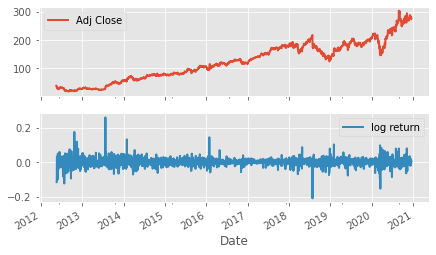

In [16]:
fb[['Adj Close', 'log return']].plot(subplots=True, figsize=(7,4), lw=2)


In [17]:
# fb.to_csv('/Users/linus/Desktop/fb book stock price', index=True)

In [18]:
# fb.to_excel('/Users/linus/Desktop/fb book stock price.xlsx')